# Churn Prediction in Telecom Industry using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display

In [2]:
#Load the dataset
file = "Customer-Churn.csv"
dataset = pd.read_csv(file)

In [3]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
dataset.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
dataset.shape

(7043, 21)

In [7]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#Changing from int to categorical
dataset['SeniorCitizen']=pd.Categorical(dataset['SeniorCitizen'])
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors = "coerce")
dataset.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

# Initial Analysis

In [9]:
# divide the DS int numerical , categorical

numerics = ['float64', 'int64']
numeric_ds = dataset.select_dtypes(include=numerics) # for all numerical Datatypes
objects_ds = dataset.select_dtypes(exclude=numerics) # all categorical datatypes

In [10]:
objects_ds.describe().T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


In [11]:
dataset.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

# Numerical Data Analysis

[]

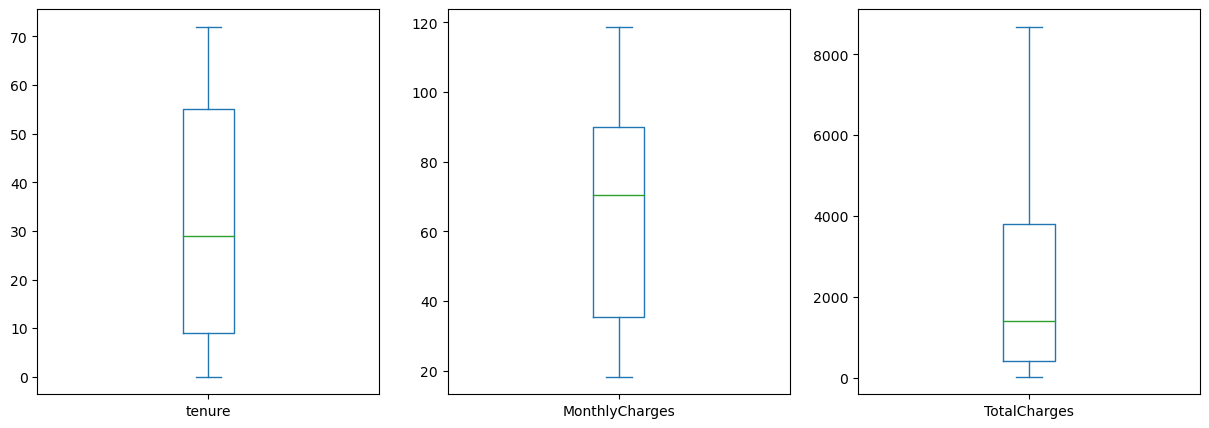

In [12]:
# We use plots to check how values are distributed, how columns relate with each other and 
# how they relate and help predict the ‘Churn’ variable. 
# for distribution, use the boxplot and histogram plots:

# box plots
numeric_ds.plot(kind = 'box', subplots = True, figsize=(15,5))
plt.plot()

[]

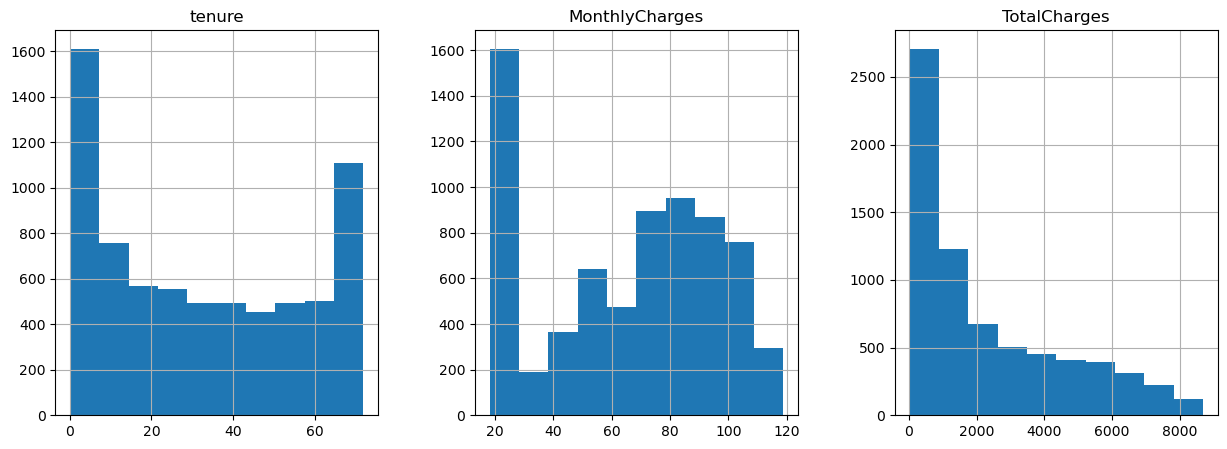

In [13]:
numeric_ds.hist(layout=(1,3), figsize=(15,5))
plt.plot()

In [14]:
# Relate these numeric data to churn variable to know how they relate / impact
numeric_ds = pd.concat([numeric_ds,dataset["Churn"]],axis=1) #Add the 'Churn' variable to the numeric dataset
numeric_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7032 non-null   float64
 3   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 220.2+ KB


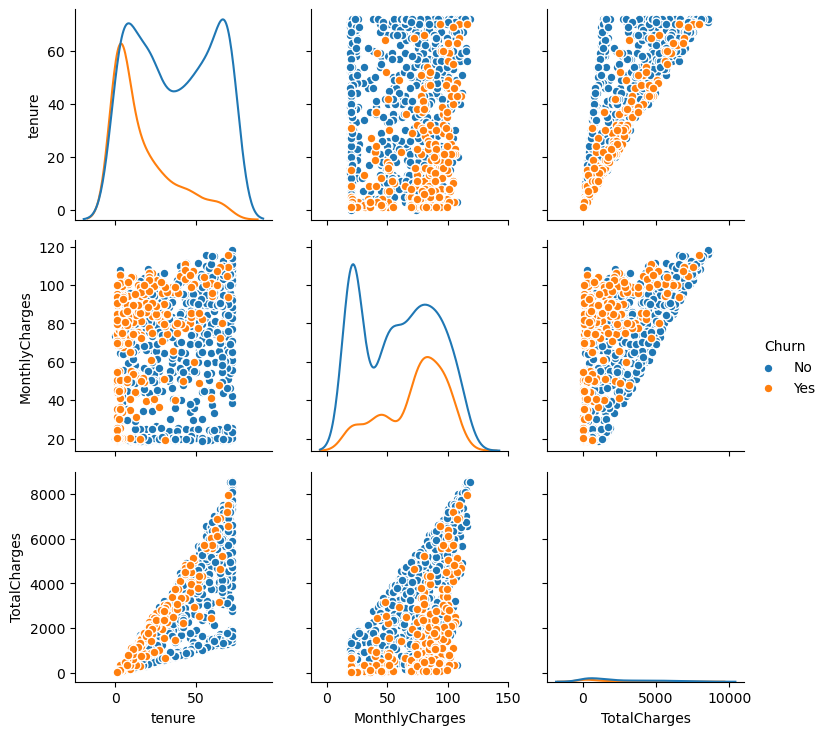

In [15]:
g = sns.PairGrid(numeric_ds.sample(n=1000), hue="Churn") # is to plot subplots
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot) # known as kernal density estimation.
g = g.add_legend()

In [16]:
#observing the plots, monthly charges and tenure seems to be playing good role in churn, and can act as a good predictors
# use violinplots based on kernel density. it is a combination of box plot and density plot

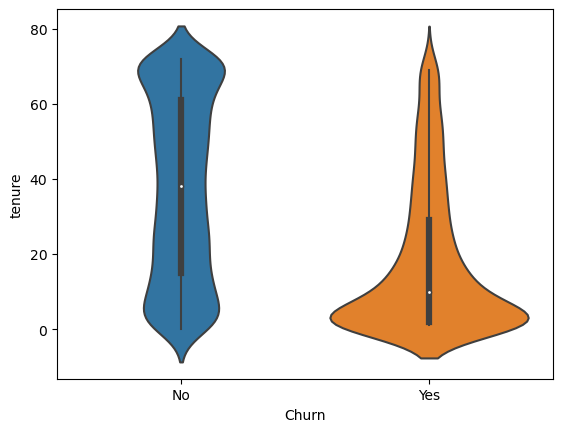

In [17]:
sns.violinplot(x="Churn", y="tenure", data=numeric_ds);

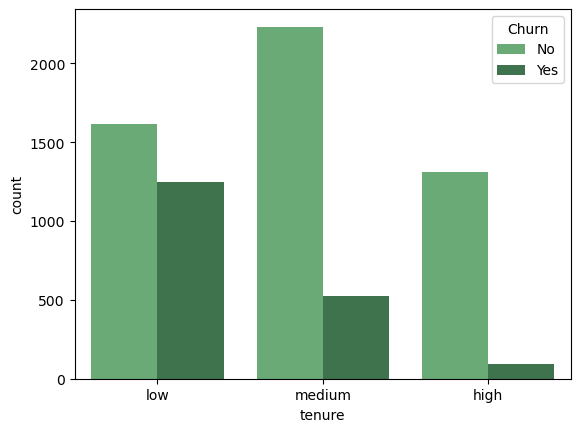

In [18]:
# Group the tenure into bins as [0-20],[20-60],[60-80] as low , medium, high 
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
#plot the graph, with relation to churn
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

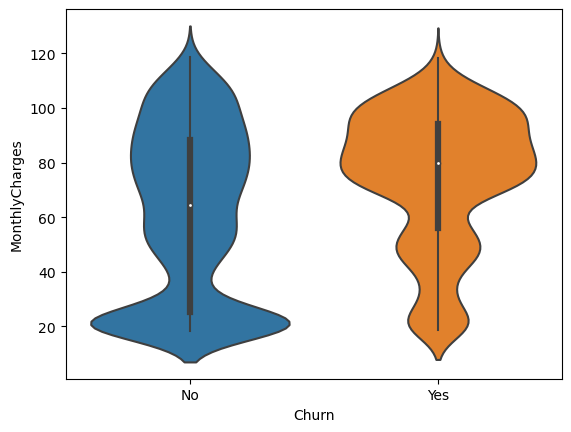

In [19]:
#similarly, monthly charges
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_ds);

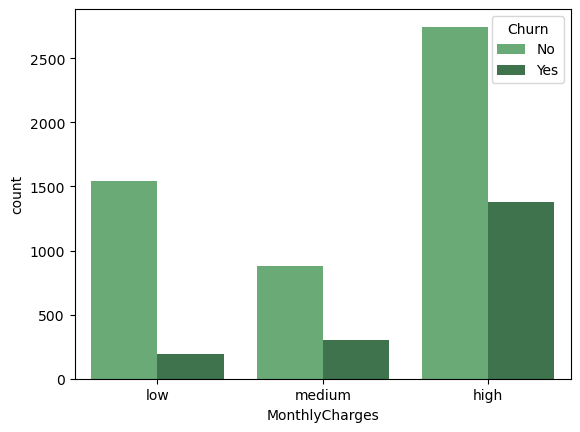

In [20]:
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

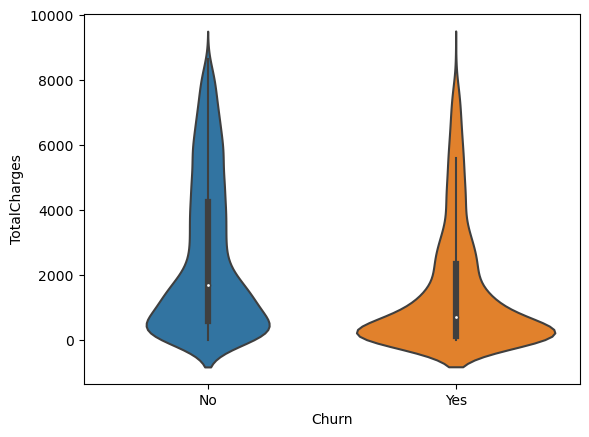

In [21]:
# With total Charges
sns.violinplot(x="Churn", y="TotalCharges", data=numeric_ds);

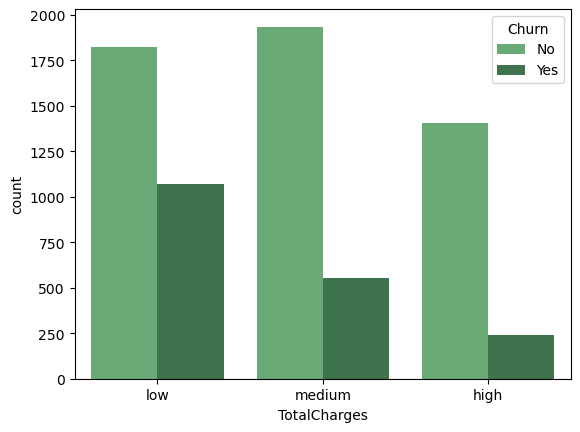

In [22]:
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

In [23]:
# Thus, there are 3 bins for numerical variables according to the violin plot 
# from this we can try to separate / distinguish the low churn rate areas from the high churn rate areas
# Save all bins into a variable bin-another data frame now.

bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T

# Numeric vs Categorical Plots

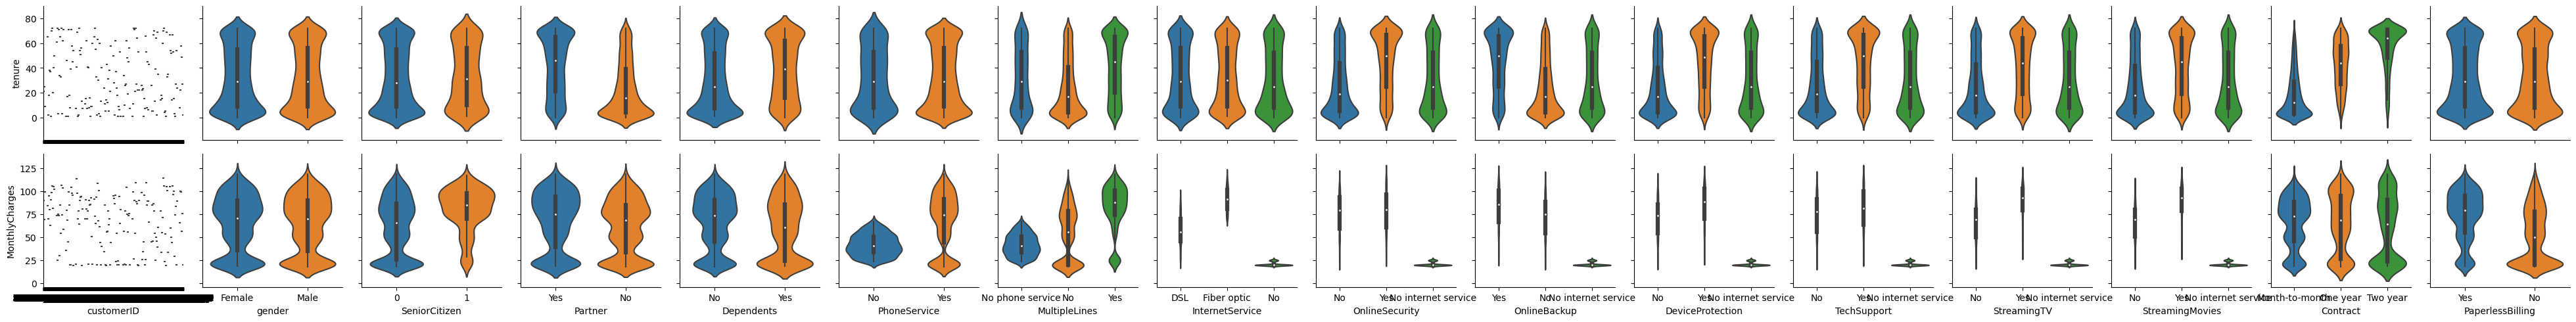

In [24]:
# take all the categorical data and numerical data to plot
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[0:16].values, y_vars=numeric_ds.columns[0:2].values)
g.map(sns.violinplot);

In [25]:
# As the graphs are clumsy, we will split into 0:6 columns, then 6-12 cols, 12- 16 cols

C:\Users\KAVYA\conda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


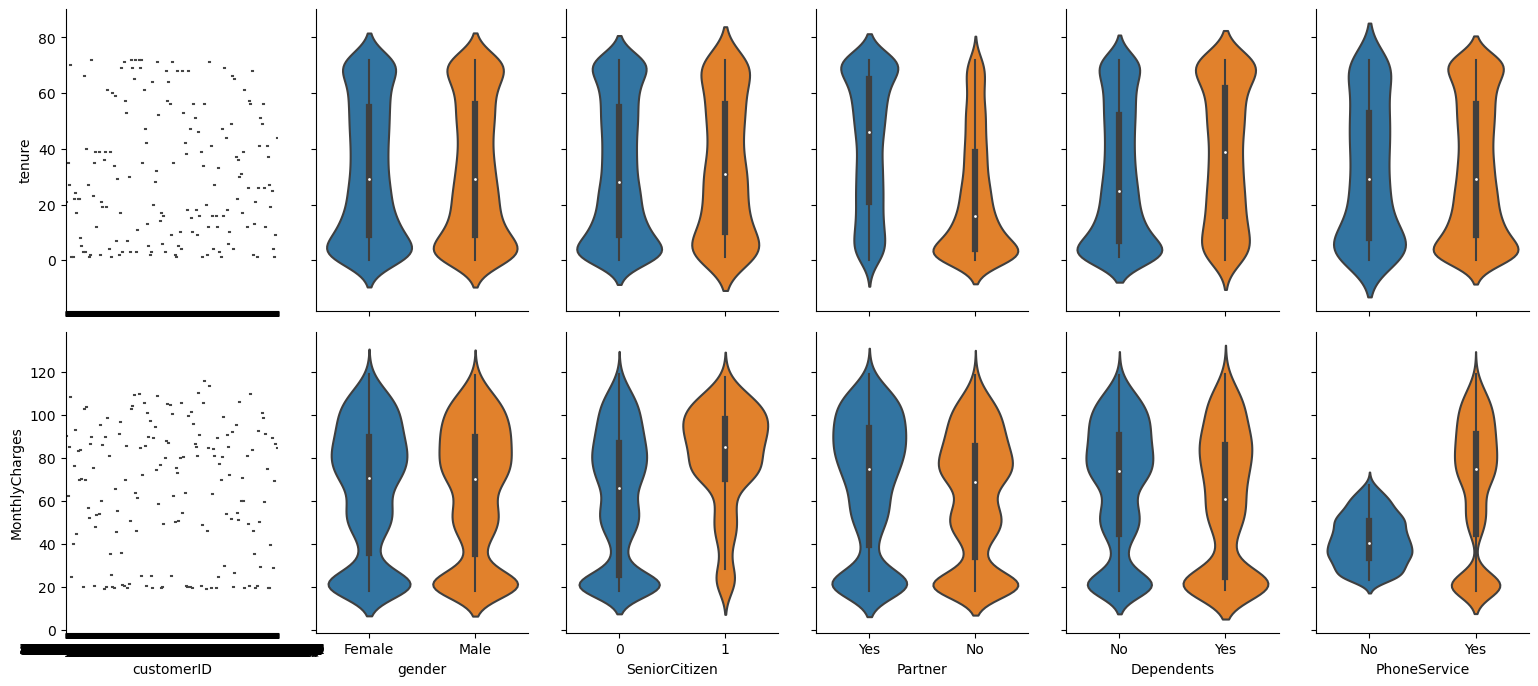

In [26]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[0:6].values,y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

C:\Users\KAVYA\conda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


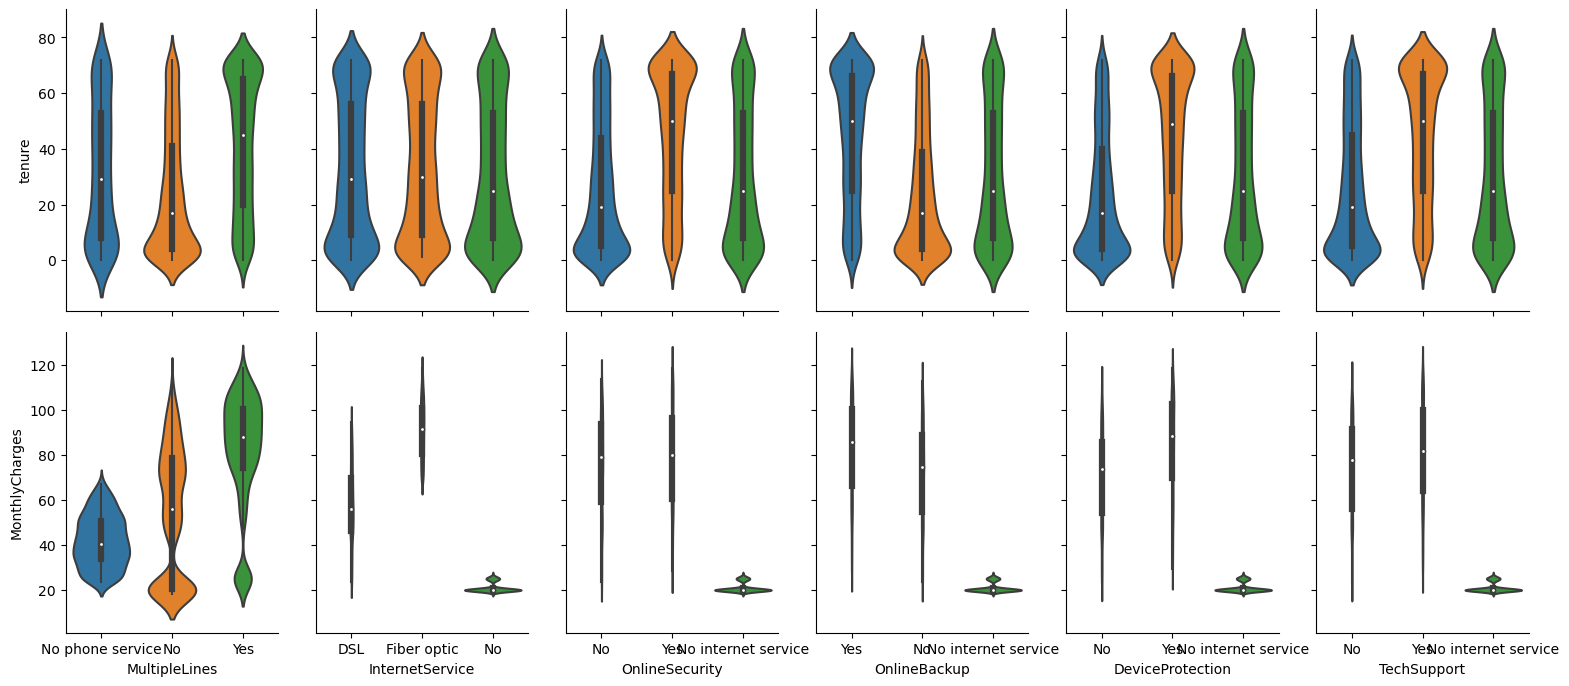

In [27]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[6:12].values, y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

C:\Users\KAVYA\conda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


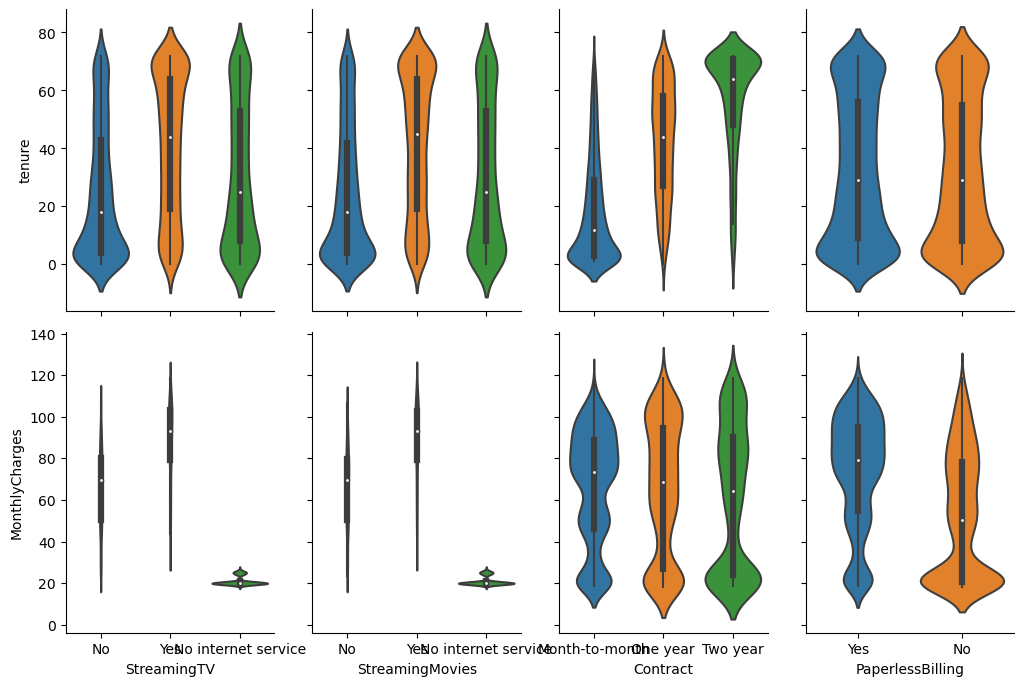

In [28]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[12:16].values,y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

C:\Users\KAVYA\conda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


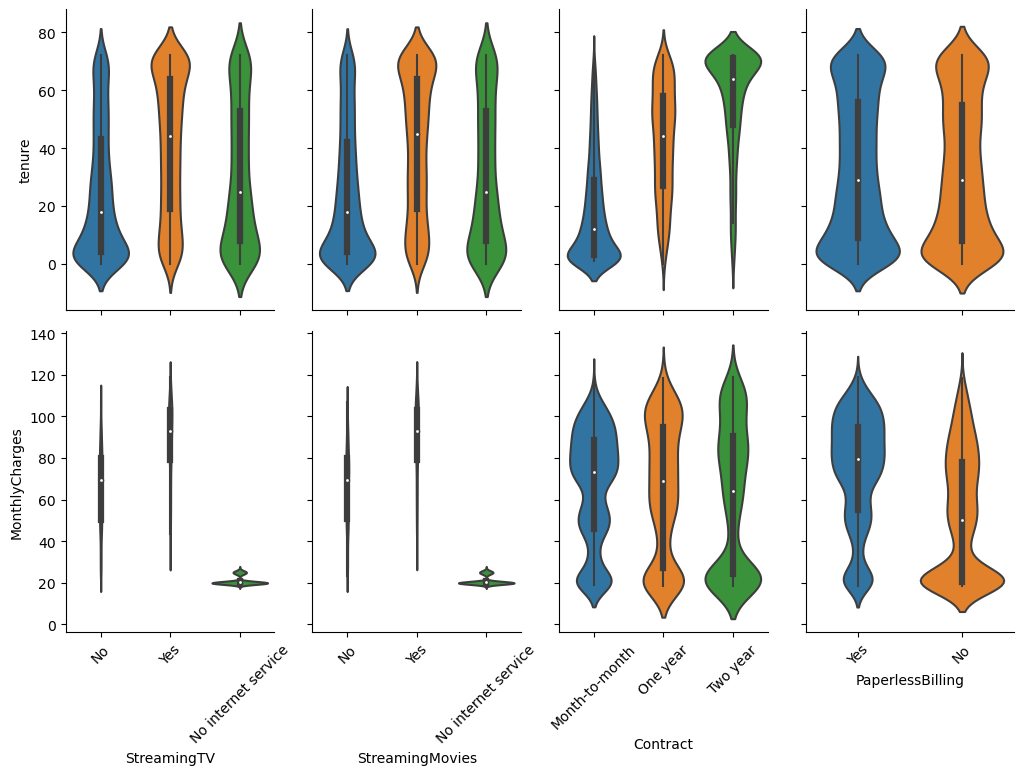

In [29]:
# Coz, the names of the lables are overlapping, do the following
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[12:16].values,y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
for ax in g.axes.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
g.map(sns.violinplot)

In [30]:
## Those plots shows us how each of the categorical variables relates to the numerical variables, 
# for example the clients which the Payment method is electronic or mailed check have a lower tenure and 
# we can also see the variables that does not influence the tenure or Monthly Payment like the gender, 
# this is important for when we design the retention campaigns so we know where we can focus, 
# but we still don’t know the variables that influences the most so we can focus on the variables 
# that will give us the best return and we also would like to know the clients with the highest chance of leaving.

# Categorical Plots

In [31]:
churn_count = len(dataset['Churn'] == 'Yes')
print(churn_count)

7043


In [32]:
del objects_ds['customerID']

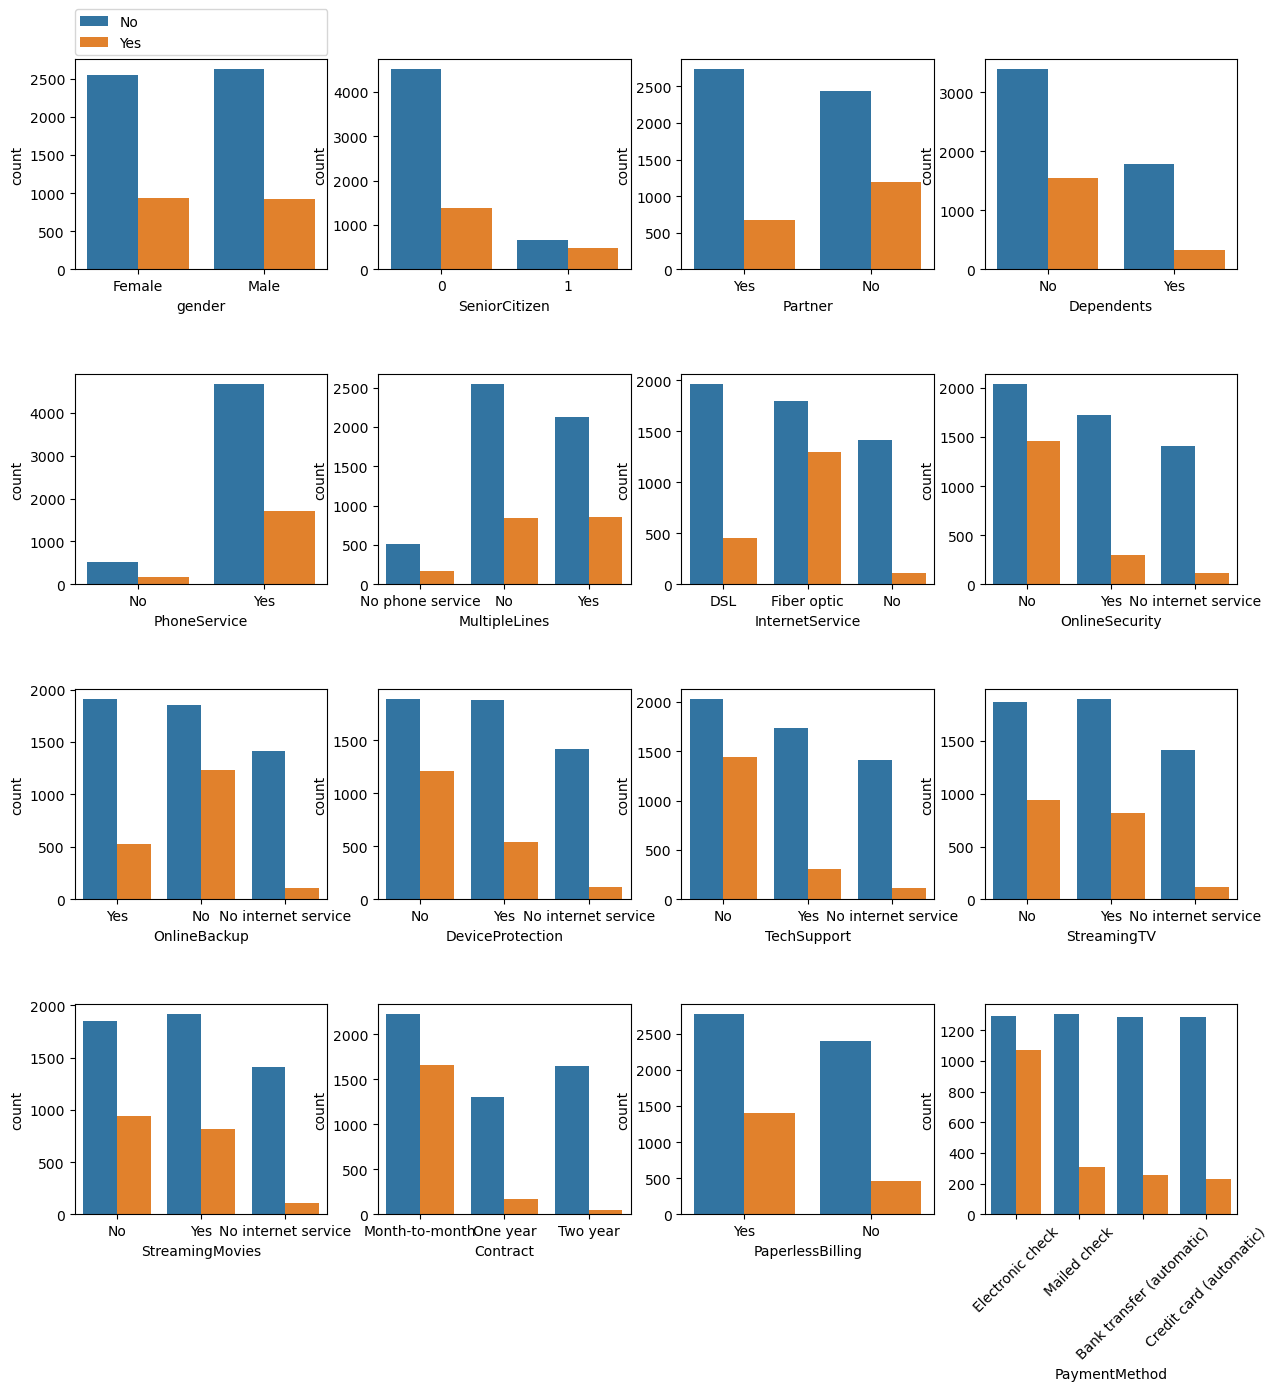

In [33]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

In [34]:
# From this graph, we understand that Streaming Movies, TV and Contract, Paperbilling, Payment Method Online backup , device protection, Support Online Service all play a good role in determining. hence we will keep all of the variables.
# Gender is neutral, male and female, both tend to show similar results, similarly, multiple lines.

# Split Train and Test Data

In [35]:
# Concatenate numerical bins with object variables

data=pd.concat([bins,objects_ds],axis=1)  
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(data) # Transform the categorical variables into binary vectors



In [36]:
features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features].values
Y = dummy["Churn_Yes"].values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [37]:
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8133427963094393
[[936  85]
 [178 210]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1021
           1       0.71      0.54      0.61       388

    accuracy                           0.81      1409
   macro avg       0.78      0.73      0.75      1409
weighted avg       0.80      0.81      0.80      1409



C:\Users\KAVYA\conda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# Shows the accuracy score to be 81%. which is a good score.
# More Data Wrangling can be performed to see if we can improve the performance..